In [1]:
# Importing the Necessary Libraries

import json
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Importing the dataset

dataset = pd.read_csv("../Dataset/bengaluru_house_prices.csv")
dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13315,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13316,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13317,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
# Dropping the Unnecessary Features

dataset = dataset.drop(['area_type','society','balcony','availability'],axis='columns')
dataset

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13314,Whitefield,5 Bedroom,3453,4.0,231.00
13315,Richards Town,4 BHK,3600,5.0,400.00
13316,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13317,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [4]:
# Dropping the Columns with NULL Values

dataset = dataset.dropna()

In [5]:
# Removing any leading or following tspace from location

dataset['location'] = dataset['location'].apply(lambda x : x.strip())

C:\Users\aryan\AppData\Local\Temp\ipykernel_8336\2638091402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['location'] = dataset['location'].apply(lambda x : x.strip())


In [6]:
# Changing the Format of Features as per required format

dataset['size'] = dataset['size'].apply(lambda x: int(x.split(' ')[0]))
dataset

C:\Users\aryan\AppData\Local\Temp\ipykernel_8336\2762127524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['size'] = dataset['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13314,Whitefield,5,3453,4.0,231.00
13315,Richards Town,4,3600,5.0,400.00
13316,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13317,Padmanabhanagar,4,4689,4.0,488.00


In [7]:
def clean_totalsqft(x) :
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [8]:
# Apply the cleaning function and Made a total_sqft feature usefull
dataset['total_sqft'] = dataset['total_sqft'].apply(clean_totalsqft)

C:\Users\aryan\AppData\Local\Temp\ipykernel_8336\484199047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['total_sqft'] = dataset['total_sqft'].apply(clean_totalsqft)


In [9]:
# Dropping the Columns with NULL Values

dataset = dataset.dropna()

In [10]:
# Implementing Dummy Variables for ENcoding Multiclass Categorical Value

locations = dataset.groupby('location')['location'].count().sort_values(ascending=False)
locations

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [11]:
# Extracting the Location Having Less than 10 occurance

other_locations = locations[locations <= 10]
other_locations

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [12]:
# Cluubing all the less ocuring location in same category called 'Other'

dataset['location'] = dataset['location'].apply(lambda x : 'Other' if x in other_locations else x)
dataset

C:\Users\aryan\AppData\Local\Temp\ipykernel_8336\1669959238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['location'] = dataset['location'].apply(lambda x : 'Other' if x in other_locations else x)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13314,Whitefield,5,3453.0,4.0,231.00
13315,Other,4,3600.0,5.0,400.00
13316,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13317,Padmanabhanagar,4,4689.0,4.0,488.00


In [13]:
# Implementing Feature Enginnering and Make New COlumn Price_Per_Sq_Ft for Outlier Detection

dataset['Price_Per_Sq_Ft'] = dataset['price'] * 100000 / dataset['total_sqft']

C:\Users\aryan\AppData\Local\Temp\ipykernel_8336\992179603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Price_Per_Sq_Ft'] = dataset['price'] * 100000 / dataset['total_sqft']


In [14]:
# Removing the Tuples Having less than 300 sq.ft area per bedroom because it is the busssiness estimate

dataset = dataset[~((dataset['total_sqft'] / dataset['size']) < 300)]

In [15]:
# Analyzing Price_Per_Sq_Ft column for outlier removal

dataset['Price_Per_Sq_Ft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_Per_Sq_Ft, dtype: float64

In [16]:
# Removing the Extereme cases using Standard-deviation

def Clean_Price_Per_Sq_Ft(dataset) :
    dataset_out = pd.DataFrame()
    
    for key,subdf in dataset.groupby('location') :
        mean = np.mean(subdf.Price_Per_Sq_Ft)
        std = np.std(subdf.Price_Per_Sq_Ft)
        reduced_df = subdf[(subdf.Price_Per_Sq_Ft > (mean - std)) & (subdf.Price_Per_Sq_Ft < (mean + std))]
        dataset_out = pd.concat([dataset_out,reduced_df],ignore_index=True)
        
    return dataset_out

In [17]:
dataset = Clean_Price_Per_Sq_Ft(dataset)

In [18]:
def Plot_Scatter_Chart(dataset , locations) :
    bhk2 = dataset[(dataset['location'] == locations) & (dataset['size'] == 2)]
    bhk3 = dataset[(dataset['location'] == locations) & (dataset['size'] == 3)]
    plt.scatter(x = bhk2['total_sqft'] , y = bhk2['price'] , color = 'blue' , label = '2 BHK' , s = 50 , marker = '.')
    plt.scatter(x = bhk3['total_sqft'] , y = bhk3['price'] , color = 'green' , label = '3 BHK' , s = 50 , marker = '+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(locations)
    plt.legend()

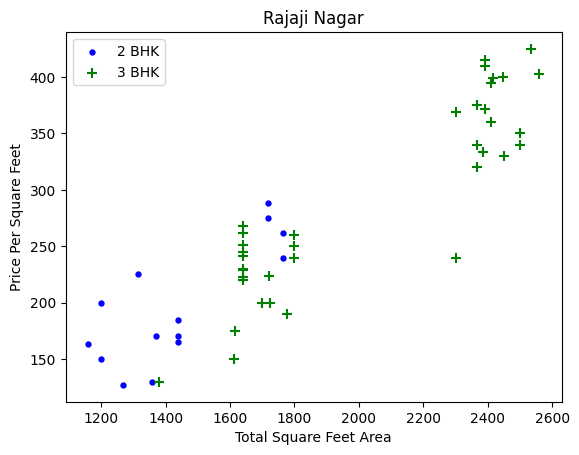

In [19]:
Plot_Scatter_Chart(dataset , "Rajaji Nagar")

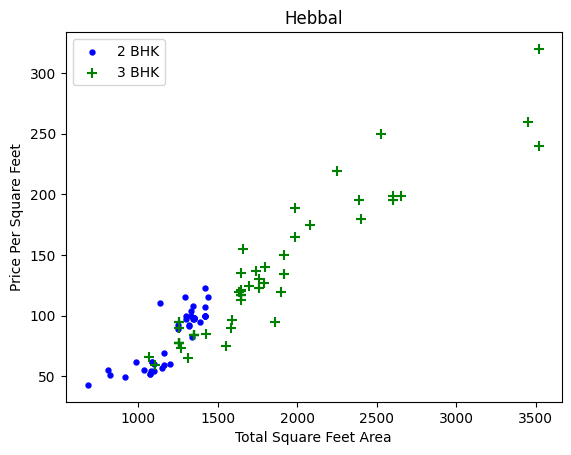

In [20]:
Plot_Scatter_Chart(dataset , 'Hebbal')

In [21]:
# Creating the FUnction to Remove the Data point Having Same Area but more expensive then 3 BHK Appartment

def Remove_BHK_Outlier(dataset) :
    exclude_indices = np.array([])
    
    for location , location_dataframe in dataset.groupby('location') :
        BHK_States = {}
        
        for BHK , BHK_dataframe in location_dataframe.groupby('size') :
            BHK_States[BHK] =  {
                'Mean' : np.mean(BHK_dataframe.Price_Per_Sq_Ft) ,
                'Standard Deviation' : np.std(BHK_dataframe.Price_Per_Sq_Ft) ,
                'Count' : BHK_dataframe.shape[0]
            }
            
        for BHK , BHK_dataframe in location_dataframe.groupby('size') :
            
            statistics = BHK_States.get(BHK - 1)
            
            if statistics and statistics['Count'] > 5 :
                exclude_indices = np.append(exclude_indices , BHK_dataframe[BHK_dataframe['Price_Per_Sq_Ft'] < (statistics['Mean'])].index.values)
                
    return dataset.drop(exclude_indices , axis = 'index')

In [22]:
# Calling the Function to Remove the Outliers based on BHK Feature

dataset = Remove_BHK_Outlier(dataset)

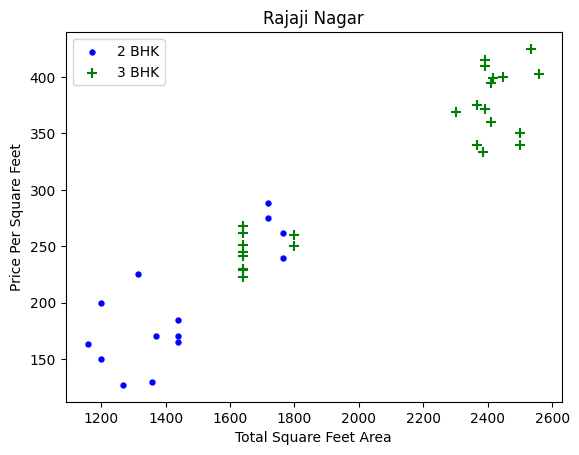

In [23]:
Plot_Scatter_Chart(dataset , "Rajaji Nagar")

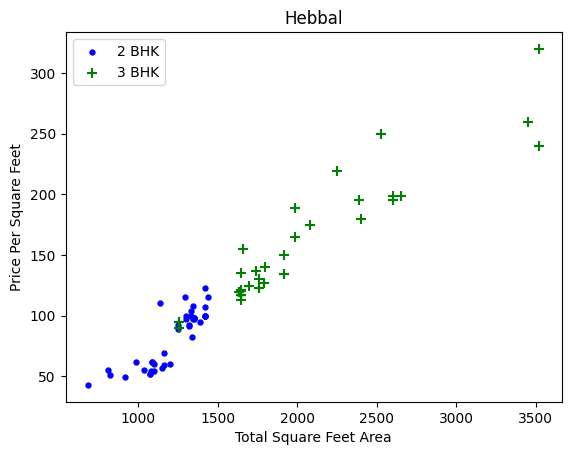

In [24]:
Plot_Scatter_Chart(dataset , 'Hebbal')

In [25]:
# Exploring the Bathroom Feature

dataset['bath'].value_counts()

bath
2.0     4188
3.0     1763
1.0      568
4.0      501
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
16.0       1
13.0       1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

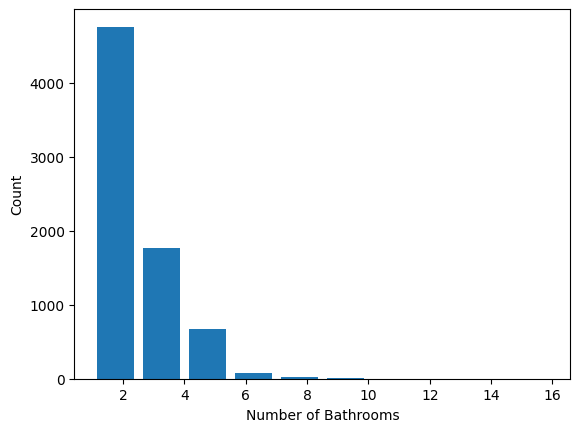

In [26]:
# Visulizing the BAthroom Feature

plt.hist(dataset['bath'] , rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [27]:
# Removing the Houses Having More Number of bathrooms than the bedroom

dataset = dataset[dataset['bath'] < dataset['size'] + 2]

In [28]:
# Drooping the Price per square feet columns because it is for only outlier detection

dataset = dataset.drop('Price_Per_Sq_Ft' , axis='columns')

In [29]:
# Implementing the One Hot ENcoding for encoding the multiclass categorical value

dummies = pd.get_dummies(dataset['location'] , dtype = int)
dataset = pd.concat([dataset , dummies.drop('Other' , axis = 'columns')] , axis = 'columns')
dataset = dataset.drop('location' , axis = 'columns')
dataset

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,2,1195.0,2.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10232,3,1692.0,3.0,108.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,6,2500.0,5.0,185.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,3,1855.0,3.0,135.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Spliting the dataset into Dependent and Independent Feature

X = dataset.drop('price' , axis = 'columns')
Y = pd.DataFrame(dataset['price'])

In [31]:
# Spliting the dataset into train and test dataset

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 14)

In [32]:
# Creating the Model

model = LinearRegression()
model

LinearRegression()

In [33]:
# Training the model

model.fit(X_train,Y_train)

LinearRegression()

In [34]:
# Evaluting the model

model.score(X_test,Y_test)

0.8916349304195543

In [35]:
# Creating the Shuffle Shift 

Croos_Validation = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 43)
cross_val_score(LinearRegression(), X , Y , cv = Croos_Validation)

array([0.78874085, 0.79927945, 0.83547176, 0.86475913, 0.89429443])

In [36]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.842253,{'fit_intercept': False}
1,lasso,0.709814,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.673238,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [37]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [38]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.26257605])

In [39]:
X.head()

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.26257605])

In [41]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88.05003459])

In [42]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([180.79049373])

In [43]:
predict_price('Indira Nagar',1000, 3, 3)

c:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([183.57795227])

In [44]:
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [45]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [48]:
model.score(X_train , Y_train)

0.8449818941008799